In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
null_values = titanic.isnull().any()
null_values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
null_values = titanic.isnull().sum()
df_null_values = pd.DataFrame(null_values, columns=['Count'])

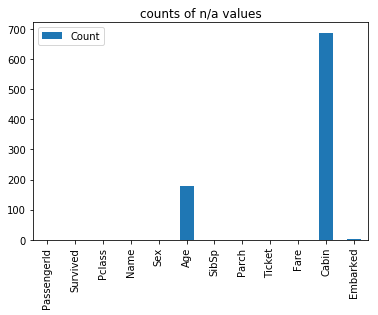

In [6]:
df_null_values
df_null_values.plot(kind='bar', title='counts of n/a values')

In [7]:
# the cabin column has the most null values

In [8]:
for col in titanic.columns:
    print('Columns name: {}'.format(col, '\n'))
    print(titanic[col].value_counts())
    print('----------------')

Columns name: PassengerId
891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
----------------
Columns name: Survived
0    549
1    342
Name: Survived, dtype: int64
----------------
Columns name: Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------
Columns name: Name
Porter, Mr. Walter Chamberlain                                       1
Green, Mr. George Henry                                              1
Newell, Miss. Madeleine

In [9]:
titanic['Cabin'].isnull().sum()
# there are 687 null values

687

In [10]:
titanic = titanic.dropna(subset=['Embarked'])
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
titanic['Cabin'] = titanic['Cabin'].fillna('¯\(ツ)/¯')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [12]:
embark = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

In [13]:
titanic = pd.concat([titanic, embark], axis=1)

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,1


In [15]:
sex_dummies = pd.get_dummies(titanic['Sex'], prefix='Sex')
titanic = pd.concat([titanic, sex_dummies], axis=1)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,1,0,1


In [17]:
titanic['IsReverend'] = titanic['Name'].str.contains('Rev.').map({True: 1, False:0})

In [27]:
title_dummies = pd.get_dummies(titanic['Name'].str.contains('Mr.'), prefix='Mr.')

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,1,0,1,0


In [36]:
titanic['Survived'].mean()

0.38245219347581555

In [18]:
gender_survived = titanic.groupby('Sex').mean()[['Survived']]

In [19]:
gender_survived

,Survived
Sex,
female,0.740385
male,0.188908


In [20]:
Survival_rate = titanic['Survived'].sum() / len(titanic['PassengerId'])
Survival_rate
# overall survival rate is 38%

0.38245219347581555

In [21]:
titanic['Sex_female'].sum()

312

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,1,0,1,0


In [23]:
titanic.groupby('Sex').mean()['Survived']

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [37]:
Female_survivalrate = titanic['Sex_female'].sum() / titanic['Survived'].sum()
print(Female_survivalrate)

0.917647058824


In [47]:
Male_survival = titanic.groupby('Sex_male').sum()['Survived'] / titanic['Survived'].sum()
print(Male_survival)

Sex_male
0    0.679412
1    0.320588
Name: Survived, dtype: float64


In [48]:
titanic.groupby('Embarked').mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [51]:
titanic.loc[titanic['Name'] == 'Rev', 'Survived'].mean()

nan

In [52]:
titanic.loc[titanic['Cabin'] == '¯\(ツ)/¯', 'Survived'].mean()

0.29985443959243085

In [55]:
titanic.loc[titanic['Age'].isnull(), 'Survived'].mean()

0.2937853107344633

In [59]:
titanic.groupby('Embarked').mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [63]:
titanic.loc[titanic['Age'] < 12].groupby('Pclass').mean()['Survived']

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [65]:
titanic.loc[titanic['Name'] == 'Capt']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsReverend


In [74]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic.loc[titanic['Survived'] == 0].sort_values('Fare', ascending=False)[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,0,1,0,1,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,0,0,1,0,1,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0,0,0,1,0
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,C,1,0,0,0,1,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,0,1,0,1,0
